In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold 

In [2]:
pd.set_option('display.max_columns', None)
churn = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [4]:
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'],errors='coerce')
churn.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


In [5]:
churn.isnull().sum().sort_values(ascending = False)/len(churn)*100

TotalCharges        0.156183
Churn               0.000000
OnlineSecurity      0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
customerID          0.000000
dtype: float64

In [6]:
churn['TotalCharges'].fillna(value = churn['TotalCharges'].median(), inplace=True)
churn['TotalCharges'].isnull().sum()

0

In [7]:
converttoBinary={
    'Yes' : 1,
    'No' : 0,
    'No internet service' : 0,
    'No phone service' : 0
}

replaceFeatureVal = ['Partner','Dependents','PhoneService','PaperlessBilling','Churn', 'OnlineSecurity', 
                    'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for i in replaceFeatureVal:
    churn[i] = churn[i].map(converttoBinary)

In [8]:
churn['MultipleLines'] = np.where(churn.MultipleLines == 'Yes', 1, 0)
churn['InternetDSL'] = np.where(churn.InternetService == 'DSL', 1, 0)
churn['InternetFiber'] = np.where(churn.InternetService == 'Fiber optic', 1, 0)
churn['Female'] = np.where(churn.gender == 'Female', 1, 0)
churn['OneYrContract'] = np.where(churn.Contract == 'One year', 1, 0)
churn['TwoYrContract'] = np.where(churn.Contract == 'Two year', 1, 0)

In [9]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetDSL,InternetFiber,Female,OneYrContract,TwoYrContract
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,0,1,0,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0,1,0,0,1,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,0,0,0
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0,1,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,0,1,1,0,0


In [10]:
x = churn.drop(['customerID','gender','InternetService','Contract','PaymentMethod','Churn'], axis = 1)
target = churn['Churn']

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
x = pd.DataFrame(scaler.fit_transform(x))
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,1.0,0.0,0.013889,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.115423,0.001275,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.472222,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.385075,0.215867,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.027778,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.354229,0.010310,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.625000,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.239303,0.210241,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.521891,0.015330,0.0,1.0,1.0,0.0,0.0


In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, n_init=10, random_state=123)
kmeans.fit(x)
y_pred = kmeans.predict(x)
kmeansDf = pd.concat([x, pd.DataFrame(y_pred, columns = ['label'])], axis = 1)
kmeanAcc = (sum(target == y_pred)/y_pred.shape[0])*100
print("The accuracy of the Kmeans is {0:.2f}%".format(kmeanAcc))

The accuracy of the Kmeans is 52.12%


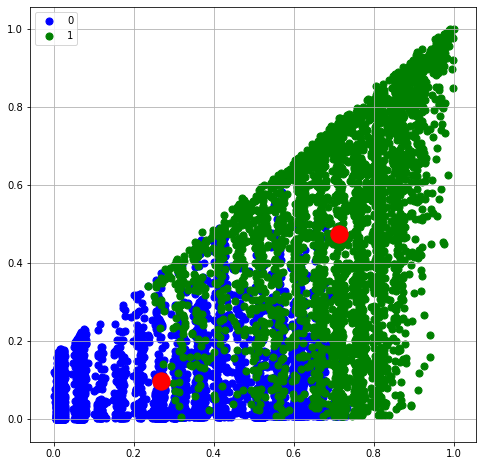

In [13]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
labels = [0,1]
colors = ['b', 'g']
for label, color in zip(labels,colors):
    indicesToKeep = kmeansDf['label'] == label
    ax.scatter(kmeansDf.loc[indicesToKeep, 13]
               , kmeansDf.loc[indicesToKeep, 14]
               , c = color
               , s = 50)
ax.legend(labels)
ax.scatter(kmeans.cluster_centers_[:, 13], kmeans.cluster_centers_[:, 14], s=300, c='red')
ax.grid()

In [14]:
from sklearn.mixture import GaussianMixture
GMM = GaussianMixture(n_components = 2)
GMM.fit(x)
y_pred = GMM.predict(x)
GmmDf = pd.concat([x, pd.DataFrame(y_pred, columns = ['label'])], axis = 1)
EmAcc = (sum(target == y_pred)/y_pred.shape[0])*100
print("The accuracy of the EM is {0:.2f}%".format(EmAcc))

The accuracy of the EM is 54.30%


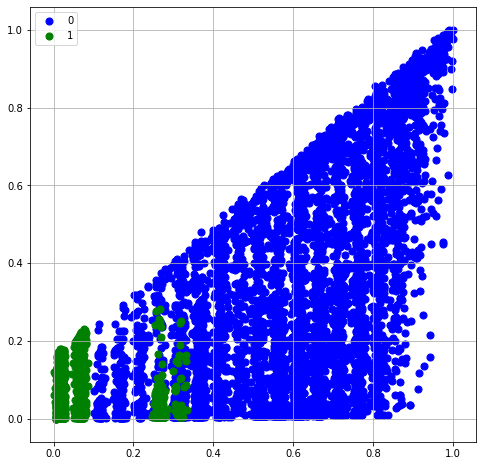

In [15]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
labels = [0,1]
colors = ['b', 'g']
for label, color in zip(labels,colors):
    indicesToKeep = GmmDf['label'] == label
    ax.scatter(GmmDf.loc[indicesToKeep, 13]
               , GmmDf.loc[indicesToKeep, 14]
               , c = color
               , s = 50)
ax.legend(labels)
ax.grid()

In [16]:
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
featureSelector = SelectFromModel(estimator=DecisionTreeClassifier(), max_features = 2).fit(x,target)
selectedX = featureSelector.transform(x)
SelectedDF = pd.DataFrame(data = selectedX, columns = ['Selected Feature 1', 'Selected Feature 2'])
finalDf = pd.concat([SelectedDF, pd.DataFrame(target)], axis = 1)
finalDf.head()

,Selected Feature 1,Selected Feature 2,Churn
0,0.013889,0.001275,0
1,0.472222,0.215867,0
2,0.027778,0.010310,1
3,0.625000,0.210241,0
4,0.027778,0.015330,1


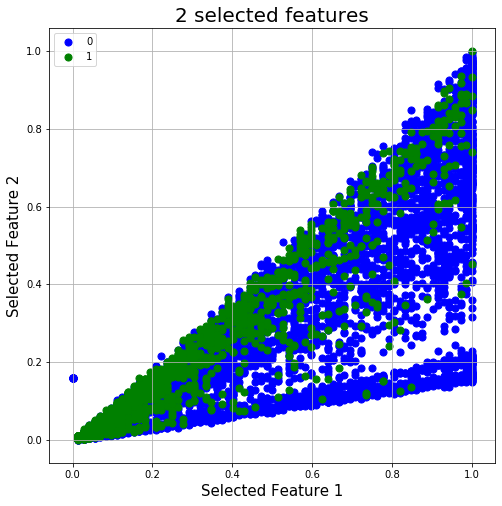

In [17]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Selected Feature 1', fontsize = 15)
ax.set_ylabel('Selected Feature 2', fontsize = 15)
ax.set_title('2 selected features', fontsize = 20)
labels = [0,1]
colors = ['b', 'g']
for label, color in zip(labels,colors):
    indicesToKeep = finalDf['Churn'] == label
    ax.scatter(finalDf.loc[indicesToKeep, 'Selected Feature 1']
               , finalDf.loc[indicesToKeep, 'Selected Feature 2']
               , c = color
               , s = 50)
ax.legend(labels)
ax.grid()

In [18]:
kmeans = KMeans(n_clusters=2, n_init=10, random_state=123)
kmeans.fit(selectedX)
y_pred = kmeans.predict(selectedX)
kmeansDf = pd.concat([SelectedDF, pd.DataFrame(y_pred, columns = ['label'])], axis = 1)
kmeanAcc = (sum(target == y_pred)/y_pred.shape[0])*100
print("The accuracy of the Kmeans with feature selection is {0:.2f}%".format(kmeanAcc))

The accuracy of the Kmeans with feature selection is 42.41%


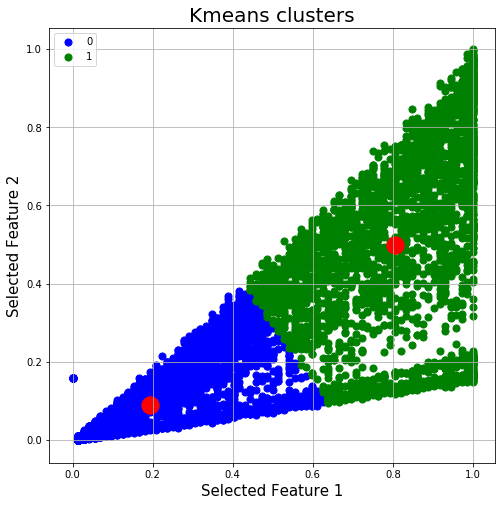

In [19]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Selected Feature 1', fontsize = 15)
ax.set_ylabel('Selected Feature 2', fontsize = 15)
ax.set_title('Kmeans clusters', fontsize = 20)
labels = [0,1]
colors = ['b', 'g']
for label, color in zip(labels,colors):
    indicesToKeep = kmeansDf['label'] == label
    ax.scatter(kmeansDf.loc[indicesToKeep, 'Selected Feature 1']
               , kmeansDf.loc[indicesToKeep, 'Selected Feature 2']
               , c = color
               , s = 50)
ax.legend(labels)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
ax.grid()

In [20]:
GMM = GaussianMixture(n_components = 2)
GMM.fit(selectedX)
y_pred = GMM.predict(selectedX)
GmmDf = pd.concat([SelectedDF, pd.DataFrame(y_pred, columns = ['label'])], axis = 1)
EmAcc = (sum(target == y_pred)/y_pred.shape[0])*100
print("The accuracy of the EM with feature selection is {0:.2f}%".format(EmAcc))

The accuracy of the EM with feature selection is 28.26%


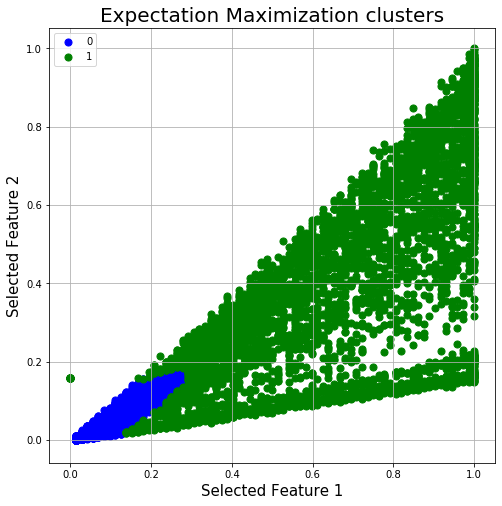

In [21]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Selected Feature 1', fontsize = 15)
ax.set_ylabel('Selected Feature 2', fontsize = 15)
ax.set_title('Expectation Maximization clusters', fontsize = 20)
labels = [0,1]
colors = ['b', 'g']
for label, color in zip(labels,colors):
    indicesToKeep = GmmDf['label'] == label
    ax.scatter(GmmDf.loc[indicesToKeep, 'Selected Feature 1']
               , GmmDf.loc[indicesToKeep, 'Selected Feature 2']
               , c = color
               , s = 50)
ax.legend(labels)
ax.grid()

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [23]:
finalDf = pd.concat([principalDf, pd.DataFrame(target)], axis = 1)
finalDf.head()

,principal component 1,principal component 2,Churn
0,-0.758853,0.479129,0
1,-0.583644,0.749426,0
2,-0.638262,0.353505,1
3,-0.381173,1.205738,0
4,-0.773746,-1.026671,1


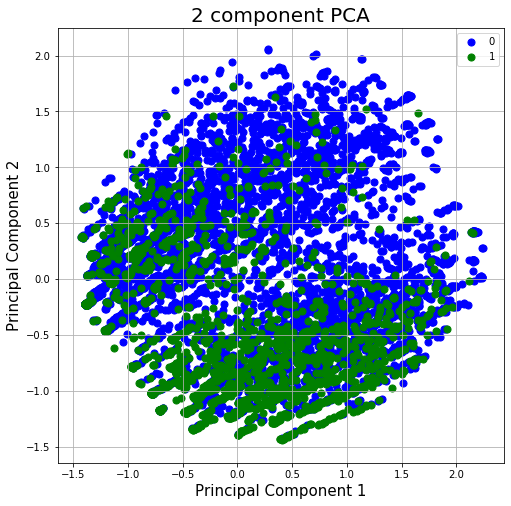

In [24]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
labels = [0,1]
colors = ['b', 'g']
for label, color in zip(labels,colors):
    indicesToKeep = finalDf['Churn'] == label
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(labels)
ax.grid()

In [25]:
kmeans = KMeans(n_clusters=2, n_init=10, random_state=123)
kmeans.fit(principalDf)
y_pred = kmeans.predict(principalDf)
kmeansDf = pd.concat([principalDf, pd.DataFrame(y_pred, columns = ['label'])], axis = 1)
kmeanAcc = (sum(target == y_pred)/y_pred.shape[0])*100
print("The accuracy of the Kmeans with PCA is {0:.2f}%".format(kmeanAcc))

The accuracy of the Kmeans with PCA is 52.18%


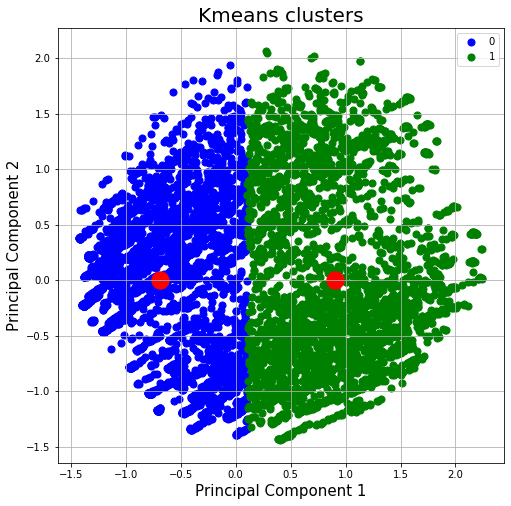

In [26]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Kmeans clusters', fontsize = 20)
labels = [0,1]
colors = ['b', 'g']
for label, color in zip(labels,colors):
    indicesToKeep = kmeansDf['label'] == label
    ax.scatter(kmeansDf.loc[indicesToKeep, 'principal component 1']
               , kmeansDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(labels)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
ax.grid()

In [27]:
GMM = GaussianMixture(n_components = 2)
GMM.fit(principalDf)
y_pred = GMM.predict(principalDf)
GmmDf = pd.concat([principalDf, pd.DataFrame(y_pred, columns = ['label'])], axis = 1)
EmAcc = (sum(target == y_pred)/y_pred.shape[0])*100
print("The accuracy of the EM with PCA is {0:.2f}%".format(EmAcc))

The accuracy of the EM with PCA is 47.58%


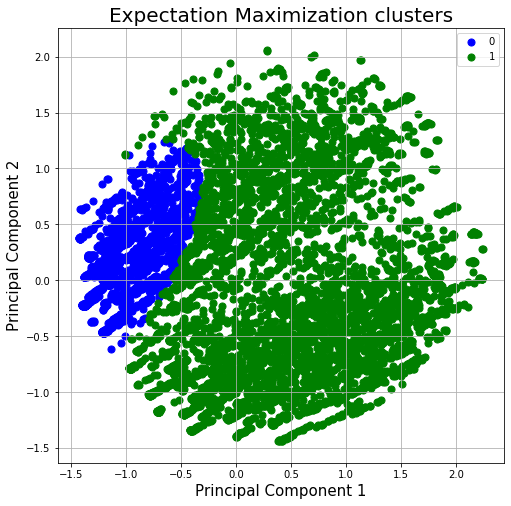

In [28]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Expectation Maximization clusters', fontsize = 20)
labels = [0,1]
colors = ['b', 'g']
for label, color in zip(labels,colors):
    indicesToKeep = GmmDf['label'] == label
    ax.scatter(GmmDf.loc[indicesToKeep, 'principal component 1']
               , GmmDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(labels)
ax.grid()

In [29]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=2)
principalComponents = ica.fit_transform(x)
icaDf = pd.DataFrame(data = principalComponents, columns = ['Independent component 1', 'Independent component 2'])
finalDf = pd.concat([icaDf, pd.DataFrame(target)], axis = 1)
finalDf.head()

,Independent component 1,Independent component 2,Churn
0,-0.011398,-0.005052,0
1,-0.014153,-0.001021,0
2,-0.008878,-0.004625,1
3,-0.019393,0.004730,0
4,0.009846,-0.016565,1


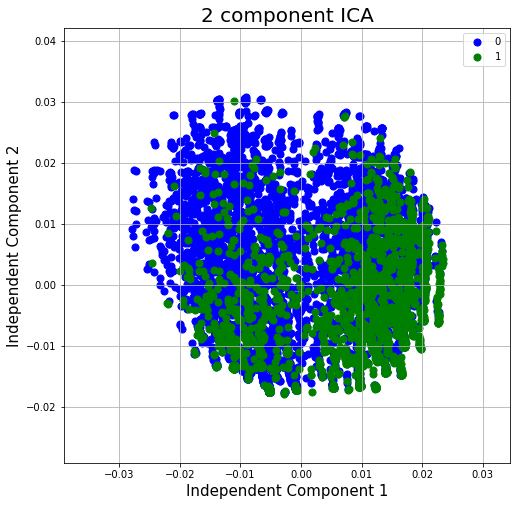

In [30]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Independent Component 1', fontsize = 15)
ax.set_ylabel('Independent Component 2', fontsize = 15)
ax.set_title('2 component ICA', fontsize = 20)
labels = [0,1]
colors = ['b', 'g']
for label, color in zip(labels,colors):
    indicesToKeep = finalDf['Churn'] == label
    ax.scatter(finalDf.loc[indicesToKeep, 'Independent component 1']
               , finalDf.loc[indicesToKeep, 'Independent component 2']
               , c = color
               , s = 50)
ax.legend(labels)
ax.grid()

In [31]:
kmeans = KMeans(n_clusters=2, n_init=10, random_state=123)
kmeans.fit(icaDf)
y_pred = kmeans.predict(icaDf)
kmeansDf = pd.concat([icaDf, pd.DataFrame(y_pred, columns = ['label'])], axis = 1)
kmeanAcc = (sum(target == y_pred)/y_pred.shape[0])*100
print("The accuracy of the Kmeans with ICA is {0:.2f}%".format(kmeanAcc))

The accuracy of the Kmeans with ICA is 66.65%


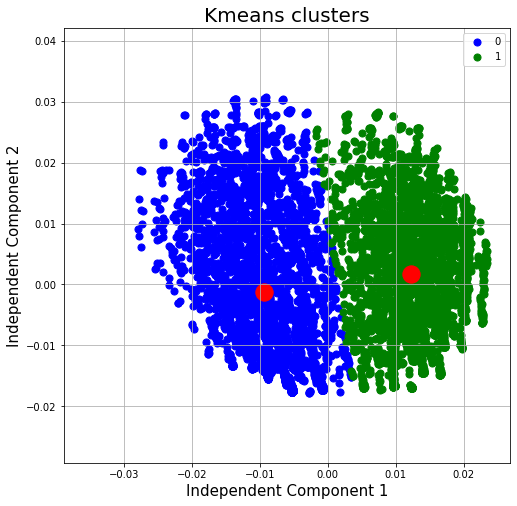

In [32]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Independent Component 1', fontsize = 15)
ax.set_ylabel('Independent Component 2', fontsize = 15)
ax.set_title('Kmeans clusters', fontsize = 20)
labels = [0,1]
colors = ['b', 'g']
for label, color in zip(labels,colors):
    indicesToKeep = kmeansDf['label'] == label
    ax.scatter(kmeansDf.loc[indicesToKeep, 'Independent component 1']
               , kmeansDf.loc[indicesToKeep, 'Independent component 2']
               , c = color
               , s = 50)
ax.legend(labels)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
ax.grid()

In [33]:
GMM = GaussianMixture(n_components = 2)
GMM.fit(icaDf)
y_pred = GMM.predict(icaDf)
GmmDf = pd.concat([icaDf, pd.DataFrame(y_pred, columns = ['label'])], axis = 1)
EmAcc = (sum(target == y_pred)/y_pred.shape[0])*100
print("The accuracy of the EM with ICA is {0:.2f}%".format(EmAcc))

The accuracy of the EM with ICA is 51.91%


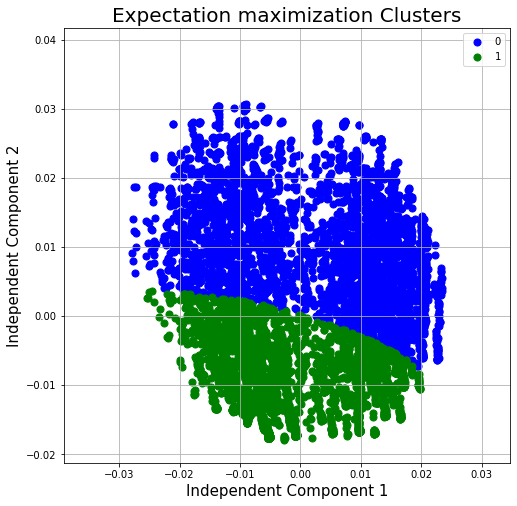

In [34]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Independent Component 1', fontsize = 15)
ax.set_ylabel('Independent Component 2', fontsize = 15)
ax.set_title('Expectation maximization Clusters', fontsize = 20)
labels = [0,1]
colors = ['b', 'g']
for label, color in zip(labels,colors):
    indicesToKeep = GmmDf['label'] == label
    ax.scatter(GmmDf.loc[indicesToKeep, 'Independent component 1']
               , GmmDf.loc[indicesToKeep, 'Independent component 2']
               , c = color
               , s = 50)
ax.legend(labels)
ax.grid()

In [35]:
from sklearn.random_projection import GaussianRandomProjection
rca = GaussianRandomProjection(n_components=2)
principalComponents = rca.fit_transform(x)
rcaDf = pd.DataFrame(data = principalComponents, columns = ['Random component 1', 'Random component 2'])
finalDf = pd.concat([rcaDf, pd.DataFrame(target)], axis = 1)
finalDf.head()

,Random component 1,Random component 2,Churn
0,-1.574386,-4.178703,0
1,-0.702493,-0.548925,0
2,0.225606,-1.928492,1
3,-1.123641,-0.868420,0
4,0.130924,-1.173571,1


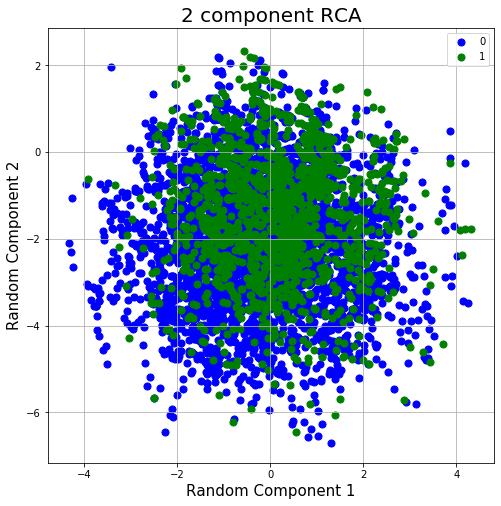

In [36]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Random Component 1', fontsize = 15)
ax.set_ylabel('Random Component 2', fontsize = 15)
ax.set_title('2 component RCA', fontsize = 20)
labels = [0,1]
colors = ['b', 'g']
for label, color in zip(labels,colors):
    indicesToKeep = finalDf['Churn'] == label
    ax.scatter(finalDf.loc[indicesToKeep, 'Random component 1']
               , finalDf.loc[indicesToKeep, 'Random component 2']
               , c = color
               , s = 50)
ax.legend(labels)
ax.grid()

In [37]:
kmeans = KMeans(n_clusters=2, n_init=10, random_state=123)
kmeans.fit(rcaDf)
y_pred = kmeans.predict(rcaDf)
kmeansDf = pd.concat([rcaDf, pd.DataFrame(y_pred, columns = ['label'])], axis = 1)
kmeanAcc = (sum(target == y_pred)/y_pred.shape[0])*100
print("The accuracy of the Kmeans with RCA is {0:.2f}%".format(kmeanAcc))

The accuracy of the Kmeans with RCA is 51.91%


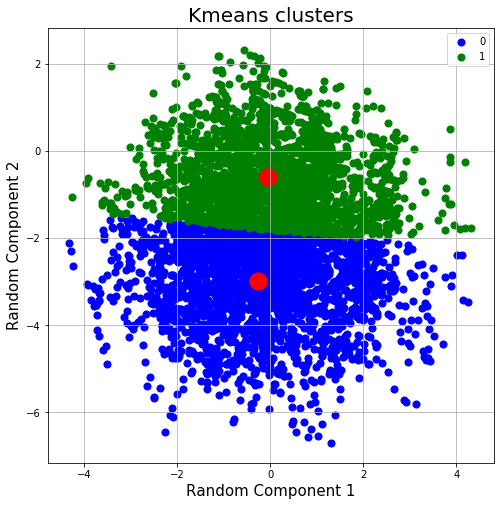

In [38]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Random Component 1', fontsize = 15)
ax.set_ylabel('Random Component 2', fontsize = 15)
ax.set_title('Kmeans clusters', fontsize = 20)
labels = [0,1]
colors = ['b', 'g']
for label, color in zip(labels,colors):
    indicesToKeep = kmeansDf['label'] == label
    ax.scatter(kmeansDf.loc[indicesToKeep, 'Random component 1']
               , kmeansDf.loc[indicesToKeep, 'Random component 2']
               , c = color
               , s = 50)
ax.legend(labels)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
ax.grid()

In [39]:
GMM = GaussianMixture(n_components = 2)
GMM.fit(rcaDf)
y_pred = GMM.predict(rcaDf)
GmmDf = pd.concat([rcaDf, pd.DataFrame(y_pred, columns = ['label'])], axis = 1)
EmAcc = (sum(target == y_pred)/y_pred.shape[0])*100
print("The accuracy of the EM with RCA is {0:.2f}%".format(EmAcc))

The accuracy of the EM with RCA is 49.41%


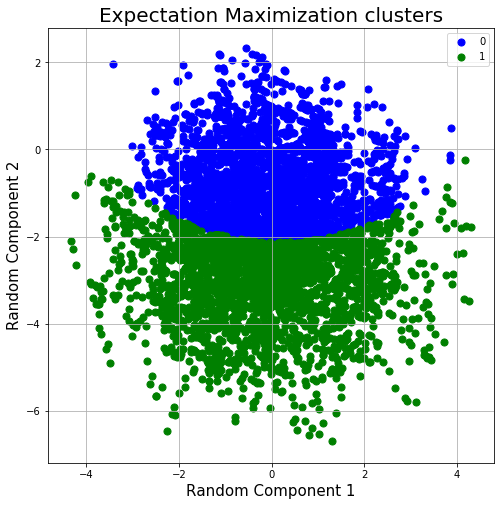

In [40]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Random Component 1', fontsize = 15)
ax.set_ylabel('Random Component 2', fontsize = 15)
ax.set_title('Expectation Maximization clusters', fontsize = 20)
labels = [0,1]
colors = ['b', 'g']
for label, color in zip(labels,colors):
    indicesToKeep = GmmDf['label'] == label
    ax.scatter(GmmDf.loc[indicesToKeep, 'Random component 1']
               , GmmDf.loc[indicesToKeep, 'Random component 2']
               , c = color
               , s = 50)
ax.legend(labels)
ax.grid()

In [41]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten
model = Sequential()
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(2, activation='sigmoid'))
model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['acc'])

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [42]:
selectedArray = np.array(SelectedDF)
print(selectedArray.shape)
from keras.utils import to_categorical
y = np.array(target)
y = to_categorical(y)
print(y.shape)

(7043, 2)
(7043, 2)


In [43]:
X_train, X_test, y_train, y_test = train_test_split(selectedArray, y, test_size= 0.1, random_state=123)
val_acc = []
kf = KFold(n_splits=5)
for train_index, val_index in kf.split(X_train):
    model.fit(X_train[train_index], y_train[train_index],epochs=5,batch_size=128)
    val_acc.append(model.evaluate(X_train[val_index],y_train[val_index],batch_size=128)[1])
selAcc = sum(val_acc)/len(val_acc)*100
print("The accuracy of the neural net with feature selection is {0:.2f}%".format(selAcc))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/5
5070/5070 [==============================] - 0s 55us/step - loss: 0.6597 - acc: 0.6077
Epoch 2/5
5070/5070 [==============================] - 0s 18us/step - loss: 0.5753 - acc: 0.7406
Epoch 3/5
5070/5070 [==============================] - 0s 28us/step - loss: 0.5707 - acc: 0.7406
Epoch 4/5
5070/5070 [==============================] - 0s 18us/step - loss: 0.5704 - acc: 0.7406
Epoch 5/5
1268/1268 [==============================] - 0s 37us/step
Epoch 1/5
5070/5070 [==============================] - 0s 16us/step - loss: 0.5756 - acc: 0.7353
Epoch 2/5
5070/5070 [==============================] - 0s 14us/step - loss: 0.5754 - acc: 0.7353
Epoch 3/5
5070/5070 [==============================] - 0s 17us/step - loss: 0.5752 - acc: 0.7353
Epoch 4/5
5070/5070 [==============================] - 0s 20us/step - loss: 0.5751 - acc: 0.7353
Epoch 5/5
1268/1268 [==============================] - 0s 9us

In [44]:
pcaArray = np.array(principalDf)
print(pcaArray.shape)

(7043, 2)


In [45]:
X_train, X_test, y_train, y_test = train_test_split(pcaArray, y, test_size= 0.1, random_state=123)
val_acc = []
kf = KFold(n_splits=5)
for train_index, val_index in kf.split(X_train):
    model.fit(X_train[train_index], y_train[train_index],epochs=5,batch_size=128)
    val_acc.append(model.evaluate(X_train[val_index],y_train[val_index],batch_size=128)[1])
pcaAcc = sum(val_acc)/len(val_acc)*100
print("The accuracy of the neural net with PCA is {0:.2f}%".format(pcaAcc))

Epoch 1/5
5070/5070 [==============================] - 0s 19us/step - loss: 0.5671 - acc: 0.7406
Epoch 2/5
5070/5070 [==============================] - 0s 20us/step - loss: 0.5661 - acc: 0.7406
Epoch 3/5
5070/5070 [==============================] - 0s 19us/step - loss: 0.5652 - acc: 0.7406
Epoch 4/5
5070/5070 [==============================] - 0s 20us/step - loss: 0.5644 - acc: 0.7406
Epoch 5/5
1268/1268 [==============================] - 0s 9us/step
Epoch 1/5
5070/5070 [==============================] - 0s 15us/step - loss: 0.5685 - acc: 0.7353
Epoch 2/5
5070/5070 [==============================] - 0s 15us/step - loss: 0.5677 - acc: 0.7353
Epoch 3/5
5070/5070 [==============================] - 0s 15us/step - loss: 0.5669 - acc: 0.7353
Epoch 4/5
5070/5070 [==============================] - 0s 14us/step - loss: 0.5661 - acc: 0.7353
Epoch 5/5
1268/1268 [==============================] - 0s 10us/step
Epoch 1/5
5070/5070 [==============================] - 0s 16us/step - loss: 0.5631 - acc:

In [46]:
icaArray = np.array(icaDf)
print(icaArray.shape)

(7043, 2)


In [47]:
X_train, X_test, y_train, y_test = train_test_split(icaArray, y, test_size= 0.1, random_state=123)
val_acc = []
kf = KFold(n_splits=5)
for train_index, val_index in kf.split(X_train):
    model.fit(X_train[train_index], y_train[train_index],epochs=5,batch_size=128)
    val_acc.append(model.evaluate(X_train[val_index],y_train[val_index],batch_size=128)[1])
icaAcc = sum(val_acc)/len(val_acc)*100
print("The accuracy of the neural net with ICA is {0:.2f}%".format(icaAcc))

Epoch 1/5
5070/5070 [==============================] - 0s 14us/step - loss: 0.5724 - acc: 0.7406
Epoch 2/5
5070/5070 [==============================] - 0s 14us/step - loss: 0.5724 - acc: 0.7406
Epoch 3/5
5070/5070 [==============================] - 0s 14us/step - loss: 0.5724 - acc: 0.7406
Epoch 4/5
5070/5070 [==============================] - 0s 16us/step - loss: 0.5725 - acc: 0.7406
Epoch 5/5
1268/1268 [==============================] - 0s 17us/step
Epoch 1/5
5070/5070 [==============================] - 0s 23us/step - loss: 0.5780 - acc: 0.7353
Epoch 2/5
5070/5070 [==============================] - 0s 17us/step - loss: 0.5779 - acc: 0.7353
Epoch 3/5
5070/5070 [==============================] - 0s 17us/step - loss: 0.5780 - acc: 0.7353
Epoch 4/5
5070/5070 [==============================] - 0s 16us/step - loss: 0.5779 - acc: 0.7353
Epoch 5/5
1268/1268 [==============================] - 0s 10us/step
Epoch 1/5
5070/5070 [==============================] - 0s 17us/step - loss: 0.5769 - acc

In [48]:
rcaArray = np.array(rcaDf)
print(rcaArray.shape)

(7043, 2)


In [49]:
X_train, X_test, y_train, y_test = train_test_split(rcaArray, y, test_size= 0.1, random_state=123)
val_acc = []
kf = KFold(n_splits=5)
for train_index, val_index in kf.split(X_train):
    model.fit(X_train[train_index], y_train[train_index],epochs=5,batch_size=128)
    val_acc.append(model.evaluate(X_train[val_index],y_train[val_index],batch_size=128)[1])
rcaAcc = sum(val_acc)/len(val_acc)*100
print("The accuracy of the neural net with RCA is {0:.2f}%".format(rcaAcc))

Epoch 1/5
5070/5070 [==============================] - 0s 14us/step - loss: 0.6078 - acc: 0.7386
Epoch 2/5
5070/5070 [==============================] - 0s 14us/step - loss: 0.6005 - acc: 0.7406
Epoch 3/5
5070/5070 [==============================] - 0s 13us/step - loss: 0.5984 - acc: 0.7406
Epoch 4/5
5070/5070 [==============================] - 0s 13us/step - loss: 0.5967 - acc: 0.7406
Epoch 5/5
1268/1268 [==============================] - 0s 8us/step
Epoch 1/5
5070/5070 [==============================] - 0s 14us/step - loss: 0.5988 - acc: 0.7353
Epoch 2/5
5070/5070 [==============================] - 0s 12us/step - loss: 0.5974 - acc: 0.7353
Epoch 3/5
5070/5070 [==============================] - 0s 12us/step - loss: 0.5960 - acc: 0.7353
Epoch 4/5
5070/5070 [==============================] - 0s 12us/step - loss: 0.5948 - acc: 0.7353
Epoch 5/5
1268/1268 [==============================] - 0s 9us/step
Epoch 1/5
5070/5070 [==============================] - 0s 18us/step - loss: 0.5922 - acc: 

<BarContainer object of 4 artists>

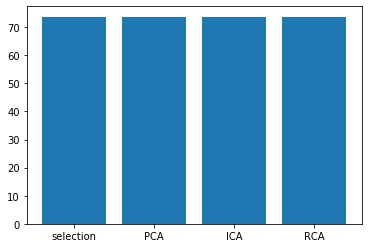

In [50]:
performance = [selAcc, pcaAcc, icaAcc, rcaAcc]
transType = ['selection', 'PCA', 'ICA', 'RCA']
plt.bar(transType, performance, align='center')

In [51]:
kmeans = KMeans(n_clusters=2, n_init=10, random_state=123)
kmeans.fit(x)
kmeanOut = kmeans.predict(x)
GMM = GaussianMixture(n_components = 2)
GMM.fit(x)
emOut = GMM.predict(x)

In [52]:
inputArray = np.column_stack((kmeanOut, emOut))
inputArray.shape

(7043, 2)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(inputArray, y, test_size= 0.1, random_state=123)
val_acc = []
kf = KFold(n_splits=5)
for train_index, val_index in kf.split(X_train):
    model.fit(X_train[train_index], y_train[train_index],epochs=5,batch_size=128)
    val_acc.append(model.evaluate(X_train[val_index],y_train[val_index],batch_size=128)[1])
kmEmAcc = sum(val_acc)/len(val_acc)*100
print("The accuracy of the neural net with results of kmeans and EM is {0:.2f}%".format(kmEmAcc))

Epoch 1/5
5070/5070 [==============================] - 0s 15us/step - loss: 0.5740 - acc: 0.7406
Epoch 2/5
5070/5070 [==============================] - 0s 20us/step - loss: 0.5738 - acc: 0.7406
Epoch 3/5
5070/5070 [==============================] - 0s 17us/step - loss: 0.5737 - acc: 0.7406
Epoch 4/5
5070/5070 [==============================] - 0s 17us/step - loss: 0.5737 - acc: 0.7406
Epoch 5/5
1268/1268 [==============================] - 0s 10us/step
Epoch 1/5
5070/5070 [==============================] - 0s 20us/step - loss: 0.5790 - acc: 0.7353
Epoch 2/5
5070/5070 [==============================] - 0s 21us/step - loss: 0.5789 - acc: 0.7353
Epoch 3/5
5070/5070 [==============================] - 0s 20us/step - loss: 0.5789 - acc: 0.7353
Epoch 4/5
5070/5070 [==============================] - 0s 17us/step - loss: 0.5788 - acc: 0.7353
Epoch 5/5
1268/1268 [==============================] - 0s 9us/step
Epoch 1/5
5070/5070 [==============================] - 0s 14us/step - loss: 0.5777 - acc: